## Fruit and Vegetable Disease (Healthy vs Rotten) Example 01

* Kaggle page:  https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
* dataset: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten/data
* notebook: https://www.kaggle.com/code/osamaabobakr/fruit-and-vegetable-disease-healthy-vs-rotten

## Setup



### Install packages

In [1]:
packages = [
    ('numpy', 'numpy'),
    ('os', 'os-sys'), # os is built-in, this is for demonstration
    ('cv2', 'opencv-python'),
    ('re', 're'), # re is built-in, this is for demonstration
    ('random', 'random'), # random is built-in, this is for demonstration
    ('matplotlib.pyplot', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('kaggle.api.kaggle_api_extended', 'kaggle'),
    ('sklearn.model_selection', 'scikit-learn'),
    ('sklearn.utils', 'scikit-learn'),
    ('keras', 'keras'),
    ('tensorflow.keras', 'tensorflow'),
    ('tensorflow.keras.layers', 'tensorflow'),
    ('tensorflow.keras.models', 'tensorflow'),
    ('tensorflow.keras.applications', 'tensorflow'),
    ('tensorflow.keras.preprocessing.image', 'tensorflow')
]

import importlib
install = False
for package in packages:
    try:
        importlib.import_module(package[0])
    except ImportError:
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user

if install:
    print("Installation of missing packages complete. Please run the next cell to restart the kernel before proceeding.")

2024-08-30 13:17:38.394470: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-30 13:17:42.038149: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-30 13:17:43.592193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 13:17:44.507976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 13:17:44.932826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 13:17:47.932556: I tensorflow/core/platform/cpu_feature_gu

### Restart Kernel (If Installs Occured)
After a kernel restart the code submission can start with the next cell after this one.

In [2]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

## Set constants

In [3]:
DIR = "kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/"

# Main Library

In [4]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion
from kaggle.api.kaggle_api_extended import KaggleApi

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## create directories


In [5]:
! rm -rf kaggle
! mkdir -p $DIR

## download images 


In [6]:
## upload your kaggle.json file to  `/home/jupyter/.config/kaggle`
## mv kaggle.json .config/kaggle/kaggle.json

# Set up Kaggle credentials 
# You'll need your Kaggle username and API key for this part
os.environ['KAGGLE_USERNAME'] = 'YOUR_KAGGLE_USERNAME' 
os.environ['KAGGLE_KEY'] = 'YOUR_KAGGLE_API_KEY'

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download
dataset_slug = 'muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten'

# Download the dataset
api.dataset_download_files(dataset_slug, path=DIR, unzip=True)

print("Dataset downloaded successfully!")

Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
Dataset downloaded successfully!


# Loading Images

In [7]:
path = r'kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset'
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',
           'Bellpepper__Healthy', 'Bellpepper__Rotten']

class_labels = ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten',
           'Bellpepper Healthy', 'Bellpepper Rotten']



images = []
labels = []

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(path + '/' + folder):
        image = cv2.imread(path + '/' + folder + '/' + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(count)
    count += 1
    
print(len(images)), print(len(labels))

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
11370
11370


(None, None)

In [8]:
data = np.array(images).astype('float32')
data = data / 255.0

labels = np.array(labels)

print(data.shape)

(11370, 128, 128, 3)


# Prepare Labels & Shuffle Data

In [9]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

# Show Random Images

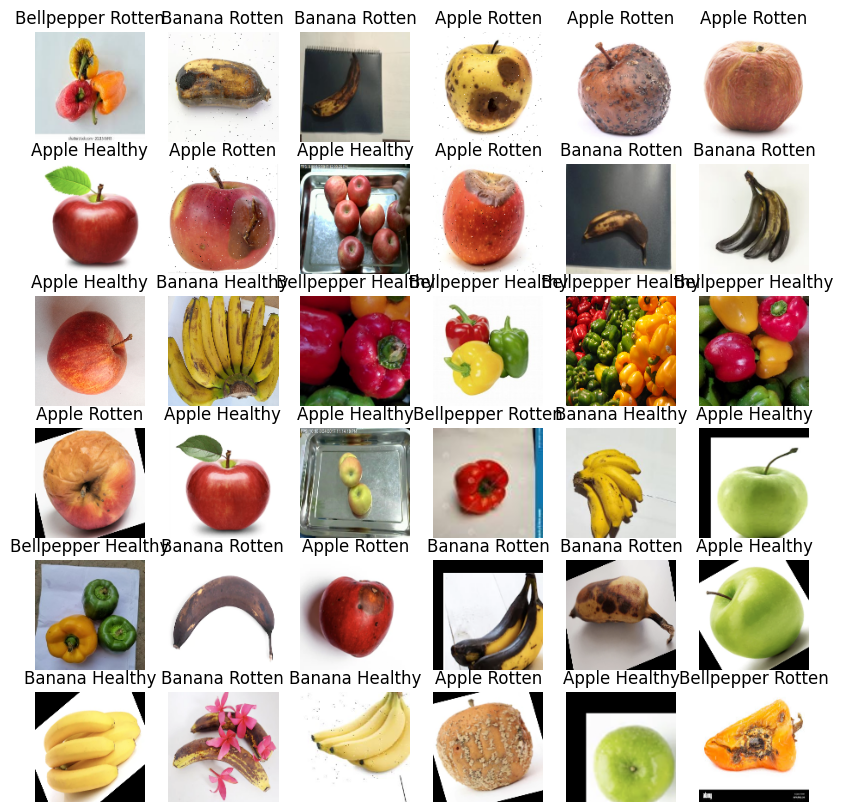

In [10]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

# Splitting Data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

# Building Deep Learning Model From Scratch

In [12]:
model = Sequential()

model.add(Conv2D(filters=9, kernel_size=(5, 5), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))

model.add(Dense(6, activation="softmax"))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 9)    │           684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 9)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 64)     │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,966,066 (7.50 MB)

 Trainable params: 1,966,066 (7.50 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss=k.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 31s 363ms/step - accuracy: 0.3973 - loss: 1.3897 - val_accuracy: 0.7511 - val_loss: 0.6615
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 343ms/step - accuracy: 0.7825 - loss: 0.5895 - val_accuracy: 0.8017 - val_loss: 0.5878
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - accuracy: 0.8485 - loss: 0.4372 - val_accuracy: 0.8742 - val_loss: 0.3507
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.8794 - loss: 0.3351 - val_accuracy: 0.8769 - val_loss: 0.3221
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.8968 - loss: 0.2876 - val_accuracy: 0.9120 - val_loss: 0.2471
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.9222 - loss: 0.2219 - val_accuracy: 0.9151 - val_loss: 0.2645
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 313ms/step - accuracy: 0.9380 - loss: 0.1749 - val_accuracy: 0.9270 - val_loss: 0.2069
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 315ms/step - accuracy: 0.9397 - loss: 0.1723 - val_accu

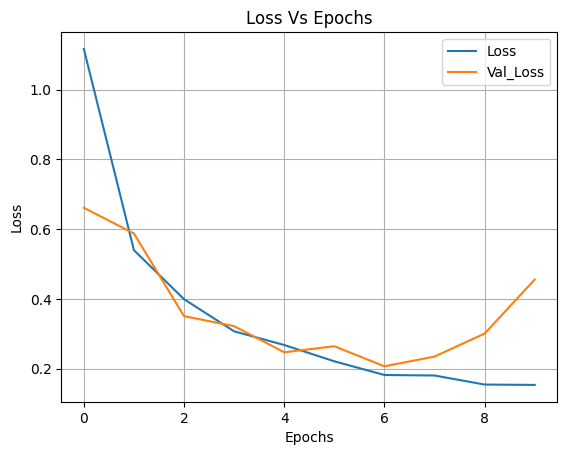

In [14]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

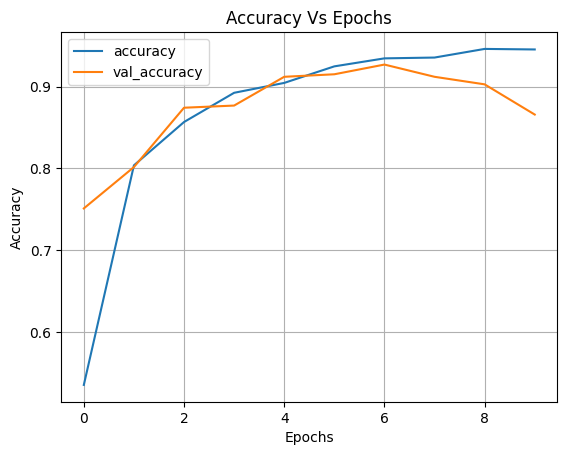

In [15]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Building Pre-Training Model

## EfficientNetV2M

In [16]:
model_B7 = k.applications.efficientnet_v2.EfficientNetV2M(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

In [17]:
model = k.models.Sequential()
model.add(model_B7)
model.add(k.layers.Flatten())
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(512, activation="relu"))
model.add(k.layers.Dropout(0.5))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dense(6, activation="softmax"))


model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 464s 6s/step - accuracy: 0.9790 - loss: 0.0709 - val_accuracy: 0.4872 - val_loss: 2.0821
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step - accuracy: 0.9841 - loss: 0.0588 - val_accuracy: 0.3386 - val_loss: 1.7688
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 459s 6s/step - accuracy: 0.8663 - loss: 0.5178 - val_accuracy: 0.6007 - val_loss: 1.2599
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 465s 6s/step - accuracy: 0.9664 - loss: 0.1179 - val_accuracy: 0.2216 - val_loss: 6.4318
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 457s 6s/step - accuracy: 0.8918 - loss: 0.3569 - val_accuracy: 0.5303 - val_loss: 1.8753


## Mobile Net

In [22]:
model_mobilenet = MobileNet()
model_1 = k.models.Sequential()
for layer in model_mobilenet.layers[:-1]:
    model_1.add(layer)
for layers in model_1.layers:
    layers.trainable = False
    
    
model_1.add(Dense(6, activation="softmax"))
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             

 Total params: 4,259,870 (16.25 MB)

 Trainable params: 6,006 (23.46 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

In [23]:
model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.7395 - loss: 1.6170 - val_accuracy: 0.9244 - val_loss: 0.2649
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9371 - loss: 0.2045 - val_accuracy: 0.9261 - val_loss: 0.2692
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9552 - loss: 0.1567 - val_accuracy: 0.9560 - val_loss: 0.1480
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.9665 - loss: 0.0950 - val_accuracy: 0.9503 - val_loss: 0.2092
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.9719 - loss: 0.0789 - val_accuracy: 0.9499 - val_loss: 0.1713
